In [1]:
import pandas as pd

# TripAdvisor otel yorumları veri setini yükleyelim
df = pd.read_csv("hotelReviews.csv")
print("Toplam yorum sayısı:", len(df))

# Veri yapısını görmek için ilk birkaç satırı gösterelim
df.head(5)


Toplam yorum sayısı: 68785


,hotel_url,profile_reviewer,rating,review_title,review_text,date
0,/Hotel_Review-g293974-d15235441-Reviews-Radiss...,/Profile/knight07,5,Would definitely recommend,Very close to mall and many restaurants. Great...,Nov 2023
1,/Hotel_Review-g293974-d15235441-Reviews-Radiss...,/Profile/tripswaytourism,5,"‪Radisson Collection Hotel, Vadistanbul‬","May the peace, blessings, and mercy of God be ...",Oct 2023
2,/Hotel_Review-g293974-d15235441-Reviews-Radiss...,/Profile/FredericF207,5,Lovely stay and amazing view,"Amazing staff and service, we have stayed for ...",Aug 2023
3,/Hotel_Review-g293974-d15235441-Reviews-Radiss...,/Profile/alevit595800,4,exallent,staff very helpful friendly and polite!good lo...,Aug 2023
4,/Hotel_Review-g293974-d15235441-Reviews-Radiss...,/Profile/don3ziz,5,Good hotel next to the mall,Good location next to tge mall and not far fro...,Aug 2023


Yıldız puanı dağılımı:
 rating
1     4887
2     2603
3     5188
4    13298
5    42809
Name: count, dtype: int64


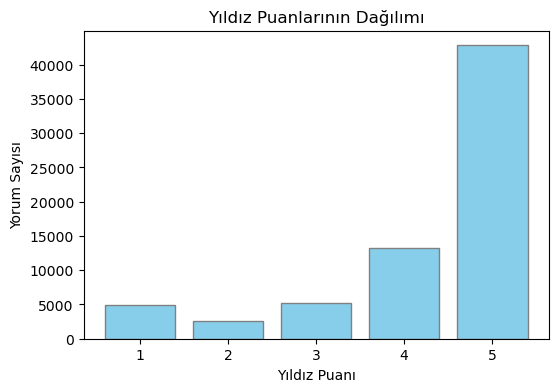

In [2]:
import matplotlib.pyplot as plt

# Yıldız puanlarının dağılımını hesaplayalım
rating_counts = df['rating'].value_counts().sort_index()
print("Yıldız puanı dağılımı:\n", rating_counts)

# Yıldız puanlarının dağılımını çubuk grafikte gösterelim
plt.figure(figsize=(6,4))
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='skyblue', edgecolor='gray')
plt.xlabel('Yıldız Puanı')
plt.ylabel('Yorum Sayısı')
plt.title('Yıldız Puanlarının Dağılımı')
plt.show()


In [3]:
# Her bir yorumun kelime sayısını hesaplayalım
review_lengths = df['review_text'].astype(str).apply(lambda x: len(x.split()))

# Yorum uzunluklarına dair özet istatistikler (ortalama, medyan, yüzde 95, 99)
print(review_lengths.describe(percentiles=[0.5, 0.95, 0.99]))


count    68785.000000
mean        81.386407
std         39.779297
min          1.000000
50%         69.000000
95%        149.000000
99%        156.000000
max        176.000000
Name: review_text, dtype: float64


In [4]:
import re
from collections import Counter

# Tüm yorumları tek bir büyük metin haline getirelim ve küçültelim
all_text = " ".join(df['review_text'].astype(str)).lower()

# Noktalama işaretlerini kaldır (kelime frekansı analizi için)
all_text_clean = re.sub(r"[^\w\s]", " ", all_text)
words = all_text_clean.split()

# Kelime frekanslarını say
freq = Counter(words)
print("En sık geçen 10 kelime (durak kelimeler dahil):", freq.most_common(10))

# İngilizce durak kelimelerini çıkarıp tekrar en sık kelimelere bakalım
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words_nostop = [w for w in words if w not in stop_words]
freq_nostop = Counter(words_nostop)
print("En sık geçen 10 kelime (durak kelimeler hariç):", freq_nostop.most_common(10))


En sık geçen 10 kelime (durak kelimeler dahil): [('the', 339160), ('and', 232464), ('to', 144903), ('a', 127123), ('is', 106371), ('was', 100065), ('hotel', 94000), ('in', 91255), ('i', 82929), ('of', 76599)]
En sık geçen 10 kelime (durak kelimeler hariç): [('hotel', 94000), ('room', 46955), ('staff', 42162), ('good', 36261), ('breakfast', 33437), ('location', 28800), ('clean', 28279), ('stay', 26911), ('great', 26093), ('rooms', 25706)]


In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama işaretlerini kaldır
    text = re.sub(r"[^\w\s]", " ", text)
    # Kelimelere böl
    tokens = nltk.word_tokenize(text)
    # Durak kelimeleri çıkar ve kelimeleri köklerine (lemma) indirgeme
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    # Tekrar metne birleştir
    return " ".join(tokens)

# Örnek kullanım:
sample_review = df['review_text'].iloc[0]
print("Orijinal:", sample_review)
print("Ön işlem sonrası:", preprocess_text(sample_review))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Orijinal: Very close to mall and many restaurants. Great location for shopping and dining out. Very professional and polite reception staff. Special thanks to Celal Yayla from the reception staff. Also I highly appreciate another staff who was courteous, polite and attentive, his name is Salahattin Başoğul. Would definitely stay again!
Ön işlem sonrası: close mall many restaurant great location shopping dining professional polite reception staff special thanks celal yayla reception staff also highly appreciate another staff courteous polite attentive name salahattin başoğul would definitely stay


In [6]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

# (Opsiyonel) Hızlı deneme amaçlı veri setini bir alt kümeye indirmek:
# df = df.sample(20000, random_state=42)

# Tabakalı şekilde eğitim (%80) ve test (%20) olarak ayır
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['rating'])
print("Eğitim veri sayısı:", len(train_df), "Test veri sayısı:", len(test_df))

# Model için etiketleri 0-4 aralığına çek (1★->0, 2★->1, ..., 5★->4)
train_df['label'] = train_df['rating'] - 1
test_df['label'] = test_df['rating'] - 1

# HuggingFace Dataset formatına dönüştür (sadece review_text ve label alanlarıyla)
train_dataset = Dataset.from_pandas(train_df[['review_text','label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df[['review_text','label']].reset_index(drop=True))


Eğitim veri sayısı: 55028 Test veri sayısı: 13757


In [7]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from datasets import Dataset

def train_and_evaluate(model_name: str, model_checkpoint: str, train_data: Dataset, test_data: Dataset, epochs: int = 2, batch_size: int = 16):
    print(f"\n{model_name} modeli eğitiliyor...")
    
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=False)
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=5)
    
    def tokenize_batch(batch):
        return tokenizer(batch['review_text'], truncation=True, padding=True, max_length=128)

    train_enc = train_data.map(tokenize_batch, batched=True)
    test_enc = test_data.map(tokenize_batch, batched=True)

    def compute_metrics(pred):
        labels = pred.label_ids
        preds = np.argmax(pred.predictions, axis=1)
        acc = accuracy_score(labels, preds)
        f1_macro = f1_score(labels, preds, average='macro')
        f1_weighted = f1_score(labels, preds, average='weighted')
        binary_labels = [1 if l >= 3 else 0 for l in labels]
        probs = np.exp(pred.predictions) / np.exp(pred.predictions).sum(axis=1, keepdims=True)
        pos_probs = probs[:, 3] + probs[:, 4]
        try:
            roc = roc_auc_score(binary_labels, pos_probs)
        except ValueError:
            roc = np.nan
        return {"accuracy": acc, "f1_macro": f1_macro, "f1_weighted": f1_weighted, "roc_auc": roc}

    training_args = TrainingArguments(
        output_dir=f"{model_name}_results",
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        eval_strategy="epoch",
        save_strategy="no",
        logging_steps=500,
        load_best_model_at_end=False,
        seed=42,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_enc,
        eval_dataset=test_enc,
        compute_metrics=compute_metrics
    )

    trainer.train()
    eval_metrics = trainer.evaluate(test_enc)
    preds = np.argmax(trainer.predict(test_enc).predictions, axis=1)
    cm = confusion_matrix(test_enc['label'], preds)

    print(f"{model_name} değerlendirme metrikleri:", eval_metrics)
    print(f"{model_name} karışıklık matrisi:\n", cm)
    
    return eval_metrics, cm, trainer.model

# Eğitilecek modeller
models = {
    "DistilBERT": "distilbert-base-uncased",
    "BERT": "bert-base-uncased",
    "RoBERTa": "roberta-base",
    "DeBERTa": "microsoft/deberta-base"
}

results = {}
confusion_matrices = {}
trained_models = {}  # ⬅ Fine-tune edilmiş modeller burada saklanacak

for name, checkpoint in models.items():
    metrics, cm, model = train_and_evaluate(name, checkpoint, train_dataset, test_dataset, epochs=2, batch_size=16)
    results[name] = metrics
    confusion_matrices[name] = cm
    trained_models[name] = model



DistilBERT modeli eğitiliyor...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/55028 [00:00<?, ? examples/s]

Map:   0%|          | 0/13757 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Roc Auc
1,0.601300,0.567804,0.762594,0.593808,0.752814,0.977200
2,0.491300,0.585039,0.760776,0.602846,0.755451,0.978323


DistilBERT değerlendirme metrikleri: {'eval_loss': 0.5850391983985901, 'eval_accuracy': 0.7607763320491386, 'eval_f1_macro': 0.6028461665058569, 'eval_f1_weighted': 0.755451314034126, 'eval_roc_auc': 0.9783232569723391, 'eval_runtime': 22.1876, 'eval_samples_per_second': 620.031, 'eval_steps_per_second': 38.76, 'epoch': 2.0}
DistilBERT karışıklık matrisi:
 [[ 771  137   50    9   10]
 [ 159  176  155   24    7]
 [  46  136  457  336   62]
 [   4   14  213 1329 1100]
 [   7    4   26  792 7733]]

BERT modeli eğitiliyor...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/55028 [00:00<?, ? examples/s]

Map:   0%|          | 0/13757 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Roc Auc
1,0.600500,0.561325,0.765429,0.599679,0.758000,0.978962
2,0.478000,0.578272,0.761939,0.604232,0.757176,0.979996


BERT değerlendirme metrikleri: {'eval_loss': 0.5782715678215027, 'eval_accuracy': 0.7619393763175111, 'eval_f1_macro': 0.6042323118187575, 'eval_f1_weighted': 0.7571755145073997, 'eval_roc_auc': 0.9799963582382731, 'eval_runtime': 42.5845, 'eval_samples_per_second': 323.052, 'eval_steps_per_second': 20.195, 'epoch': 2.0}
BERT karışıklık matrisi:
 [[ 761  150   48    5   13]
 [ 156  171  163   25    6]
 [  43  123  467  353   51]
 [   4   13  198 1357 1088]
 [   4    2   21  809 7726]]

RoBERTa modeli eğitiliyor...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/55028 [00:00<?, ? examples/s]

Map:   0%|          | 0/13757 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Roc Auc
1,0.612400,0.585768,0.761212,0.611975,0.756478,0.978953
2,0.515800,0.564781,0.767391,0.611450,0.761134,0.980552


RoBERTa değerlendirme metrikleri: {'eval_loss': 0.5647814273834229, 'eval_accuracy': 0.767391146325507, 'eval_f1_macro': 0.6114496532340565, 'eval_f1_weighted': 0.7611341208565112, 'eval_roc_auc': 0.9805523420640704, 'eval_runtime': 41.7411, 'eval_samples_per_second': 329.58, 'eval_steps_per_second': 20.603, 'epoch': 2.0}
RoBERTa karışıklık matrisi:
 [[ 796  107   57    6   11]
 [ 168  168  163   16    6]
 [  52  116  475  335   59]
 [   4    6  211 1348 1091]
 [   3    4   25  760 7770]]

DeBERTa modeli eğitiliyor...


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/55028 [00:00<?, ? examples/s]

Map:   0%|          | 0/13757 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro,F1 Weighted,Roc Auc
1,0.589500,0.556457,0.768409,0.599386,0.754501,0.979974
2,0.482000,0.563340,0.769572,0.623404,0.764324,0.981447


DeBERTa değerlendirme metrikleri: {'eval_loss': 0.5633400678634644, 'eval_accuracy': 0.7695718543287053, 'eval_f1_macro': 0.6234042118587433, 'eval_f1_weighted': 0.7643235602821581, 'eval_roc_auc': 0.9814465246309291, 'eval_runtime': 59.9189, 'eval_samples_per_second': 229.594, 'eval_steps_per_second': 14.353, 'epoch': 2.0}
DeBERTa karışıklık matrisi:
 [[ 791  121   46    5   14]
 [ 162  196  136   20    7]
 [  49  129  488  321   50]
 [   5    8  207 1358 1082]
 [   3    3   21  781 7754]]


In [8]:
# Eğitilen her modelin metriklerini yazdıralım
for name, metrics in results.items():
    acc = metrics['eval_accuracy']
    f1 = metrics['eval_f1_macro']
    roc = metrics['eval_roc_auc']
    print(f"{name}: Accuracy={acc:.3f}, Macro-F1={f1:.3f}, ROC-AUC={roc:.3f}")


DistilBERT: Accuracy=0.761, Macro-F1=0.603, ROC-AUC=0.978
BERT: Accuracy=0.762, Macro-F1=0.604, ROC-AUC=0.980
RoBERTa: Accuracy=0.767, Macro-F1=0.611, ROC-AUC=0.981
DeBERTa: Accuracy=0.770, Macro-F1=0.623, ROC-AUC=0.981


In [9]:
import torch

deberta_model = trained_models["DeBERTa"]
deberta_model.eval()

deberta_tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base", use_fast=False)

def predict_rating(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=128, padding='max_length')
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits.detach().cpu().numpy()
    pred_label = logits.argmax(axis=1)[0]
    return pred_label + 1

# Test setinden örnek yorumlar
sample_reviews = test_df.sample(5, random_state=1)

for idx, row in sample_reviews.iterrows():
    text = row['review_text']
    actual = row['rating']
    pred = predict_rating(text, deberta_model, deberta_tokenizer)
    
    if abs(pred - actual) > 1 and not (pred >= 4 and actual >= 4) and not (pred <= 2 and actual <= 2):
        consistency = "TUTARSIZ"
    else:
        consistency = "TUTARLI"
    
    print(f"Yorum:\n{text}\n")
    print(f"Gerçek puan: {actual}★, Model tahmini: {pred}★ -> {consistency}\n{'-'*80}\n")


Yorum:
Although I am turkish I am writing in english so all international guests can escape from staying at this horrible hotel. We booked the hotel for 2 days as my father is in Intensive care unit at hospital nearby thinking that it is a wyndham hotel without knowing it is only a unqualified franchise!  As they said we can pay day by day, we paid for the first night saying that we will pay for the second day the next morning. Guess what? After no sleep for 36hours at the hospital, while we checked in and sleeping at 21h49 they called us to tell they received an online reservation for our suit room starting from tomorrow although the reception guy told us initially that he booked for 2 days and closed our room for reservation for others'online booking. When I asked them what it means

Gerçek puan: 1★, Model tahmini: 1★ -> TUTARLI
--------------------------------------------------------------------------------

Yorum:
I stayed at this hotel while working in Kadıköy and I'm afraid I wou